In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('TodosReembolsosBahia.csv', encoding='latin1')
print(len(dataset)) #118796 linhas
dataset.head()

118796


/Users/lucasrcsantana/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ano,CódigoCandidato,CódigoDocumento,ValorTotalLiquido,CódigoReembolso,NomeParlamentar,DocumentoDoParlamentar,DocumentoParlamentar,Mandato,Estado,...,TipoDocumento,DataEmissão,ValorDocumento,ValorRemarcado,ValorLíquidoReembolso,Mês,Parcelado,Passageiro,PercursoViagem,NúmeroLote
0,2009,1063,1570103,800.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,1,"Mar 6, 2009",800.0,0.0,800.0,3,0,NaN,NaN,390844
1,2009,1063,1570107,430.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,1,"Mar 6, 2009",430.0,0.0,430.0,3,0,NaN,NaN,390844
2,2009,1063,1570118,4195.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,0,"Apr 13, 2009",4195.0,0.0,4195.0,4,0,NaN,NaN,390853
3,2009,1063,1570121,3970.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,0,"Apr 13, 2009",3970.0,0.0,3970.0,4,0,NaN,NaN,390852
4,2009,1063,1583550,800.0,2912,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,1,"Apr 8, 2009",800.0,0.0,800.0,4,0,NaN,NaN,395314


In [3]:
PartidoDict = {'DEM': 1, 'PCdoB': 2, 'PDT': 3, 'PEN': 4, 'PHS': 5, 'PMDB': 6, 'PP': 7, 'PPS': 8, 'PR': 9, 'PRB': 10,
       'PROS': 11, 'PRP': 12, 'PSB': 13, 'PSC': 14, 'PSD': 15, 'PSDB': 16, 'PT': 17, 'PTB': 18, 'PTN': 19, 'PV': 20,
       'SD': 21}

In [4]:
dataset.Ano.unique() #[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [5]:
dataset.NomeParlamentar.unique()
"""    'JOÃO LEÃO', 'JOSÉ ROCHA', 'MÁRIO NEGROMONTE', 'SEVERIANO ALVES',
       'COLBERT MARTINS', 'LUIZ ALBERTO', 'GERALDO SIMÕES',
       'NELSON PELLEGRINO', 'PAULO MAGALHÃES', 'JAIRO CARNEIRO',
       'ALICE PORTUGAL', 'ANTONIO CARLOS MAGALHÃES NETO', 'LUIZ BASSUMA',
       'DANIEL ALMEIDA', 'JOSÉ CARLOS ARAÚJO', 'LUIZ CARREIRA',
       'MARCELO GUIMARÃES FILHO', 'LÍDICE DA MATA', 'EDSON DUARTE',
       'FÁBIO SOUTO', 'FERNANDO DE FABINHO', 'MILTON BARBOSA',
       'SÉRGIO BRITO', 'ULDURICO PINTO', 'ZEZÉU RIBEIRO',
       'JOÃO CARLOS BACELAR', 'MAURÍCIO TRINDADE', 'ROBERTO BRITTO',
       'TONHA MAGALHÃES', 'VELOSO', 'JOSEPH BANDEIRA', 'EDIGAR MÃO BRANCA',
       'JUTAHY JUNIOR', 'MÁRCIO MARINHO', 'EMILIANO JOSÉ',
       'FÉLIX MENDONÇA', 'JOÃO ALMEIDA', 'JORGE KHOURY',
       'JOSÉ CARLOS ALELUIA', 'MARCOS MEDRADO', 'SÉRGIO BARRADAS CARNEIRO',
       'CLAUDIO CAJADO', 'WALTER PINHEIRO', 'GEDDEL VIEIRA LIMA',
       'JOSIAS GOMES', 'ARTHUR OLIVEIRA MAIA', 'OZIEL OLIVEIRA',
       'VALMIR ASSUNÇÃO', 'WALDENOR PEREIRA', 'ANTONIO IMBASSAHY',
       'FÉLIX MENDONÇA JÚNIOR', 'AMAURI TEIXEIRA', 'FERNANDO TORRES',
       'RUI COSTA', 'JOSÉ NUNES', 'EDSON PIMENTA', 'LUIZ ARGÔLO',
       'LUCIO VIEIRA LIMA', 'ERIVELTON SANTANA', 'ANTONIO BRITO',
       'JÂNIO NATAL', 'ACELINO POPÓ', 'AFONSO FLORENCE',
       'ZE CARLOS DA PESCA', 'LUIZ DE DEUS', 'BENITO GAMA', 'BEBETO',
       'CACÁ LEÃO', 'IRMÃO LAZARO', 'PAULO AZI', 'JORGE SOLLA',
       'ULDURICO JUNIOR', 'CAETANO', 'BACELAR', 'MÁRIO NEGROMONTE JR.',
       'RONALDO CARLETTO', 'MOEMA GRAMACHO', 'ELMAR NASCIMENTO',
       'JOÃO GUALBERTO', 'TIA ERON', 'DAVIDSON MAGALHÃES',
       'PASTOR LUCIANO BRAGA', 'ROBINSON ALMEIDA'"""

"    'JOÃO LEÃO', 'JOSÉ ROCHA', 'MÁRIO NEGROMONTE', 'SEVERIANO ALVES',\n       'COLBERT MARTINS', 'LUIZ ALBERTO', 'GERALDO SIMÕES',\n       'NELSON PELLEGRINO', 'PAULO MAGALHÃES', 'JAIRO CARNEIRO',\n       'ALICE PORTUGAL', 'ANTONIO CARLOS MAGALHÃES NETO', 'LUIZ BASSUMA',\n       'DANIEL ALMEIDA', 'JOSÉ CARLOS ARAÚJO', 'LUIZ CARREIRA',\n       'MARCELO GUIMARÃES FILHO', 'LÍDICE DA MATA', 'EDSON DUARTE',\n       'FÁBIO SOUTO', 'FERNANDO DE FABINHO', 'MILTON BARBOSA',\n       'SÉRGIO BRITO', 'ULDURICO PINTO', 'ZEZÉU RIBEIRO',\n       'JOÃO CARLOS BACELAR', 'MAURÍCIO TRINDADE', 'ROBERTO BRITTO',\n       'TONHA MAGALHÃES', 'VELOSO', 'JOSEPH BANDEIRA', 'EDIGAR MÃO BRANCA',\n       'JUTAHY JUNIOR', 'MÁRCIO MARINHO', 'EMILIANO JOSÉ',\n       'FÉLIX MENDONÇA', 'JOÃO ALMEIDA', 'JORGE KHOURY',\n       'JOSÉ CARLOS ALELUIA', 'MARCOS MEDRADO', 'SÉRGIO BARRADAS CARNEIRO',\n       'CLAUDIO CAJADO', 'WALTER PINHEIRO', 'GEDDEL VIEIRA LIMA',\n       'JOSIAS GOMES', 'ARTHUR OLIVEIRA MAIA', 'OZIEL OLIVEI

In [6]:
dataset = dataset.drop('NúmeroDocumento',axis = 1)
dataset = dataset.drop('cnpj_cpf',axis = 1)
dataset = dataset.drop('CódigoMandato',axis = 1)
dataset = dataset.drop('CódigoDocumento',axis = 1)
dataset = dataset.drop('CódigoReembolso',axis = 1)
dataset = dataset.drop('DocumentoDoParlamentar',axis = 1)
dataset = dataset.drop('DocumentoParlamentar',axis = 1)
dataset = dataset.drop('CódigoCandidato',axis = 1)
dataset = dataset.drop('NúmeroLote',axis = 1)
dataset.head()


,Ano,ValorTotalLiquido,NomeParlamentar,Mandato,Estado,Partido,NúmeroSubquota,DescriçãoSubquota,CódigoSubquota,DescriçãoGrupoSubquota,Fornecedor,TipoDocumento,DataEmissão,ValorDocumento,ValorRemarcado,ValorLíquidoReembolso,Mês,Parcelado,Passageiro,PercursoViagem
0,2009,800.0,JOÃO LEÃO,2011.0,BA,PP,1,Maintenance of office supporting parliamentary...,0,NaN,MARCÍLIO BARRETO MARQUES ALMEIDA,1,"Mar 6, 2009",800.0,0.0,800.0,3,0,NaN,NaN
1,2009,430.0,JOÃO LEÃO,2011.0,BA,PP,1,Maintenance of office supporting parliamentary...,0,NaN,OSVALDO ORNELLAS MENDONÇA,1,"Mar 6, 2009",430.0,0.0,430.0,3,0,NaN,NaN
2,2009,4195.0,JOÃO LEÃO,2011.0,BA,PP,5,Publicity of parliamentary activity,0,NaN,"LAYOUT EDITORA, GRÁFICA, PUBLICIDADE E COMUNIC...",0,"Apr 13, 2009",4195.0,0.0,4195.0,4,0,NaN,NaN
3,2009,3970.0,JOÃO LEÃO,2011.0,BA,PP,3,Fuels and lubricants,4,Sem especificações,POSTO DE COMBUSTÍVEIS VERDES MARES LTDA,0,"Apr 13, 2009",3970.0,0.0,3970.0,4,0,NaN,NaN
4,2009,800.0,JOÃO LEÃO,2011.0,BA,PP,1,Maintenance of office supporting parliamentary...,0,NaN,MARCÍLIO BARRETO MARQUES ALMEIDA,1,"Apr 8, 2009",800.0,0.0,800.0,4,0,NaN,NaN


In [7]:
dataset.Ano = dataset.Ano.astype('category')
dataset.NomeParlamentar = dataset.NomeParlamentar.astype('category')
dataset.Fornecedor = dataset.Fornecedor.astype('category')
dataset.Mandato = dataset.Mandato.astype('category')
dataset.NúmeroSubquota = dataset.NúmeroSubquota.astype('category')
dataset.DescriçãoSubquota = dataset.DescriçãoSubquota.astype('category')
dataset.DescriçãoGrupoSubquota = dataset.DescriçãoGrupoSubquota.astype('category')
dataset.Estado = dataset.Estado.astype('category')
dataset.Partido = dataset.Partido.astype('category')
dataset.CódigoSubquota = dataset.CódigoSubquota.astype('category')
dataset.TipoDocumento = dataset.TipoDocumento.astype('category')
dataset.Mês = dataset.Mês.astype('category')
dataset.Passageiro = dataset.Passageiro.astype('category')
dataset.PercursoViagem = dataset.PercursoViagem.astype('category')
dataset.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118796 entries, 0 to 118795
Data columns (total 20 columns):
Ano                       118796 non-null category
ValorTotalLiquido         118796 non-null float64
NomeParlamentar           118796 non-null category
Mandato                   118796 non-null category
Estado                    118796 non-null category
Partido                   118796 non-null category
NúmeroSubquota            118796 non-null category
DescriçãoSubquota         118796 non-null category
CódigoSubquota            118796 non-null category
DescriçãoGrupoSubquota    56823 non-null category
Fornecedor                118796 non-null category
TipoDocumento             118796 non-null category
DataEmissão               118796 non-null object
ValorDocumento            118796 non-null float64
ValorRemarcado            118796 non-null float64
ValorLíquidoReembolso     118796 non-null float64
Mês                       118796 non-null category
Parcelado                 118

In [8]:
print(dataset.Partido.cat.categories)

Index(['DEM', 'PCdoB', 'PDT', 'PEN', 'PHS', 'PMDB', 'PP', 'PPS', 'PR', 'PRB',
       'PROS', 'PRP', 'PSB', 'PSC', 'PSD', 'PSDB', 'PT', 'PTB', 'PTN', 'PV',
       'SD'],
      dtype='object')


In [9]:
dataset.describe()

,ValorTotalLiquido,ValorDocumento,ValorRemarcado,ValorLíquidoReembolso,Parcelado
count,118796.000000,118796.000000,118796.000000,118796.000000,118796.000000
mean,716.359236,729.020973,12.034509,711.983329,0.000219
std,2496.521316,2524.774696,197.566927,2477.350104,0.014792
min,0.010000,0.090000,0.000000,0.010000,0.000000
25%,51.360000,52.830000,0.000000,51.300000,0.000000
50%,113.000000,114.200000,0.000000,113.000000,0.000000
75%,245.595000,250.000000,0.000000,245.012500,0.000000
max,140000.000000,140000.000000,21118.100000,140000.000000,1.000000


In [10]:
maxPartido = dataset.Partido[dataset.ValorLíquidoReembolso.idxmax]
maxParlamentar = dataset.NomeParlamentar[dataset.ValorLíquidoReembolso.idxmax]
maxAno = dataset.Ano[dataset.ValorLíquidoReembolso.idxmax]
maxValor = dataset.ValorLíquidoReembolso[dataset.ValorLíquidoReembolso.idxmax]
maxDescricao = dataset.DescriçãoSubquota[dataset.ValorLíquidoReembolso.idxmax]
print("O maior reembolso foi realizado para {} do {} em {} no valor de R$ {} com a descrição de {}".format(maxParlamentar, maxPartido, maxAno, maxValor, maxDescricao))
#print('O maior reembolso foi realizado em' + maxAno + ' para ' + maxParlamentar + ' do ' + maxPartido )

O maior reembolso foi realizado para FÉLIX MENDONÇA JÚNIOR do PDT em 2014 no valor de R$ 140000.0 com a descrição de Publicity of parliamentary activity


In [11]:
Partidos = list(dataset.Partido.cat.categories)
ReembolsoPartido = []
for partido in Partidos:
    reembolsado = dataset.ValorLíquidoReembolso[dataset.Partido == partido].sum()/1000000
    ReembolsoPartido.append(reembolsado)
    print('O valor reembolsado para o {} foi de R$ {} milhões'.format(partido, round(reembolsado,3)))
ReembolsoPartido = np.array(ReembolsoPartido)

O valor reembolsado para o DEM foi de R$ 9.997 milhões
O valor reembolsado para o PCdoB foi de R$ 4.396 milhões
O valor reembolsado para o PDT foi de R$ 2.976 milhões
O valor reembolsado para o PEN foi de R$ 1.518 milhões
O valor reembolsado para o PHS foi de R$ 0.266 milhões
O valor reembolsado para o PMDB foi de R$ 3.881 milhões
O valor reembolsado para o PP foi de R$ 6.318 milhões
O valor reembolsado para o PPS foi de R$ 1.602 milhões
O valor reembolsado para o PR foi de R$ 7.187 milhões
O valor reembolsado para o PRB foi de R$ 4.265 milhões
O valor reembolsado para o PROS foi de R$ 1.104 milhões
O valor reembolsado para o PRP foi de R$ 1.197 milhões
O valor reembolsado para o PSB foi de R$ 1.605 milhões
O valor reembolsado para o PSC foi de R$ 0.667 milhões
O valor reembolsado para o PSD foi de R$ 10.818 milhões
O valor reembolsado para o PSDB foi de R$ 4.963 milhões
O valor reembolsado para o PT foi de R$ 16.082 milhões
O valor reembolsado para o PTB foi de R$ 0.77 milhões
O valor

In [12]:
Parlamentares = list(dataset.NomeParlamentar.cat.categories)
ReembolsoParlamentar = []
PartidoDoParlamentar = []
for parlamentar in Parlamentares:
    reembolsado = dataset.ValorLíquidoReembolso[dataset.NomeParlamentar == parlamentar].sum()/1000000
    partido = dataset.Partido[dataset.NomeParlamentar == parlamentar]
    ReembolsoParlamentar.append(reembolsado)
    #PartidoDoParlamentar.append(partido)
    print('O valor reembolsado para {} foi de R$ {} milhões'.format(parlamentar, round(reembolsado,3)))
ReembolsoParlamentar = np.array(ReembolsoParlamentar)

O valor reembolsado para ACELINO POPÓ foi de R$ 1.129 milhões
O valor reembolsado para AFONSO FLORENCE foi de R$ 1.526 milhões
O valor reembolsado para ALICE PORTUGAL foi de R$ 1.894 milhões
O valor reembolsado para AMAURI TEIXEIRA foi de R$ 0.764 milhões
O valor reembolsado para ANTONIO BRITO foi de R$ 1.204 milhões
O valor reembolsado para ANTONIO CARLOS MAGALHÃES NETO foi de R$ 1.124 milhões
O valor reembolsado para ANTONIO IMBASSAHY foi de R$ 1.742 milhões
O valor reembolsado para ARTHUR OLIVEIRA MAIA foi de R$ 1.602 milhões
O valor reembolsado para BACELAR foi de R$ 0.731 milhões
O valor reembolsado para BEBETO foi de R$ 0.732 milhões
O valor reembolsado para BENITO GAMA foi de R$ 0.77 milhões
O valor reembolsado para CACÁ LEÃO foi de R$ 0.749 milhões
O valor reembolsado para CAETANO foi de R$ 0.748 milhões
O valor reembolsado para CLAUDIO CAJADO foi de R$ 1.958 milhões
O valor reembolsado para COLBERT MARTINS foi de R$ 0.615 milhões
O valor reembolsado para DANIEL ALMEIDA foi de 

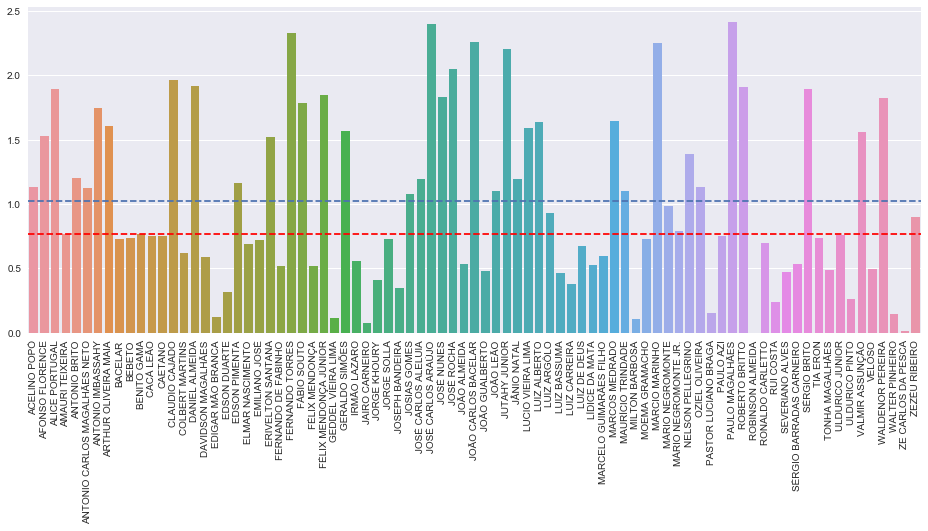

In [13]:
plt.figure(figsize=(16, 6))
parlReembolso = sns.barplot(x = Parlamentares, y = ReembolsoParlamentar)
parlReembolso.set_xticklabels(rotation=90, labels=Parlamentares)
plt.axhline(ReembolsoParlamentar.mean(), ls='--')
plt.axhline(np.median(ReembolsoParlamentar), ls='--', color='red')
plt.show()

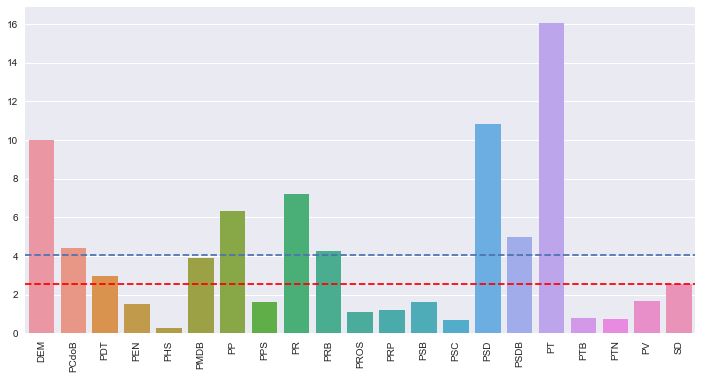

In [14]:
plt.figure(figsize=(12, 6))
partReembolso = sns.barplot(x = Partidos, y = ReembolsoPartido)
partReembolso.set_xticklabels(rotation=90, labels=Partidos)
plt.axhline(ReembolsoPartido.mean(), ls='--')
plt.axhline(np.median(ReembolsoPartido), ls='--', color='red')
plt.show()

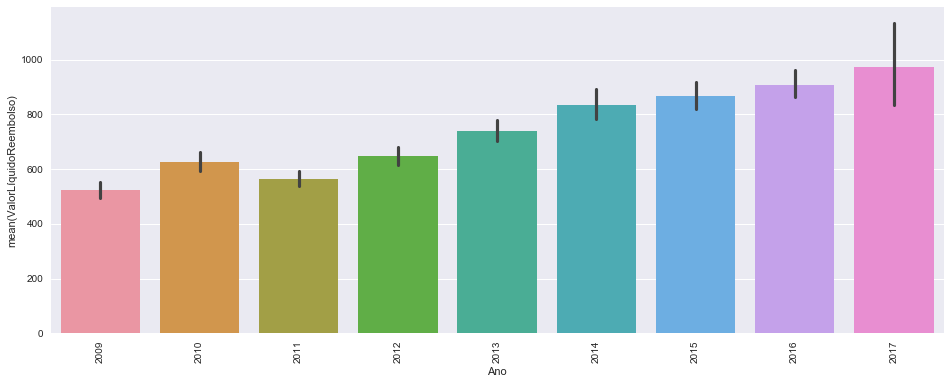

In [71]:
plt.figure(figsize=(16, 6))
anoReembolso = sns.barplot(x = dataset.Ano, y = dataset.ValorLíquidoReembolso)
anoReembolso.set_xticklabels(rotation=90, labels=dataset.Ano.cat.categories)
#plt.axhline(dataset.ValorLíquidoReembolso.mean(), ls='--')
#plt.axhline(np.median(dataset.ValorLíquidoReembolso), ls='--', color='red')
plt.show()

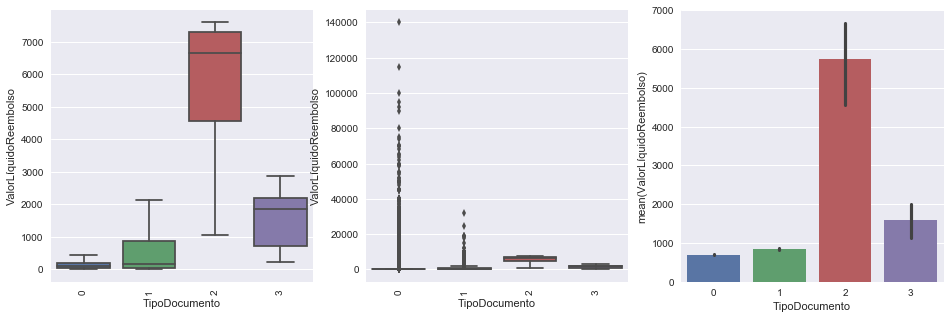

O valor reembolsado para o tipo 0 foi de R$ 74.303 milhões
O valor reembolsado para o tipo 1 foi de R$ 10.182 milhões
O valor reembolsado para o tipo 2 foi de R$ 0.075 milhões
O valor reembolsado para o tipo 3 foi de R$ 0.021 milhões


In [70]:
f , axes = plt.subplots(1,3, figsize = (16,5))
plt.figure(figsize=(16, 6))
documentoReembolso = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, showfliers=False, ax=axes[0])
documentoReembolso2 = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, ax=axes[1])
documentoReembolso3 = sns.barplot(data=dataset, x = 'TipoDocumento', y = 'ValorLíquidoReembolso', ax=axes[2])
documentoReembolso.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
documentoReembolso2.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
#plt.axhline(dataset.ValorLíquidoReembolso.mean(), ls='--')
#plt.axhline(np.median(dataset.ValorLíquidoReembolso), ls='--', color='red')
plt.show()

TiposDeDocumento = list(dataset.TipoDocumento.cat.categories)
ReembolsoDocumento = []
for documento in TiposDeDocumento:
    reembolsado = dataset.ValorLíquidoReembolso[dataset.TipoDocumento == documento].sum()/1000000
    ReembolsoDocumento.append(reembolsado)
    print('O valor reembolsado para o tipo {} foi de R$ {} milhões'.format(documento, round(reembolsado,3)))
ReembolsoDocumento = np.array(ReembolsoDocumento)

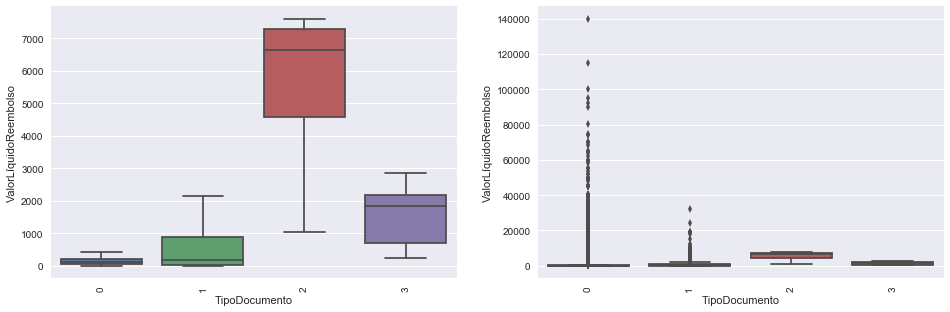

O valor reembolsado para o 0 foi de R$ 74.303 milhões
O valor reembolsado para o 1 foi de R$ 10.182 milhões
O valor reembolsado para o 2 foi de R$ 0.075 milhões
O valor reembolsado para o 3 foi de R$ 0.021 milhões


In [17]:
f , axes = plt.subplots(1,2, figsize = (16,5))
plt.figure(figsize=(16, 6))
documentoReembolso = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, showfliers=False, ax=axes[0])
documentoReembolso2 = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, ax=axes[1])
documentoReembolso.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
documentoReembolso2.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
#plt.axhline(dataset.ValorLíquidoReembolso.mean(), ls='--')
#plt.axhline(np.median(dataset.ValorLíquidoReembolso), ls='--', color='red')
plt.show()

TiposDeDocumento = list(dataset.TipoDocumento.cat.categories)
ReembolsoDocumento = []
for documento in TiposDeDocumento:
    reembolsado = dataset.ValorLíquidoReembolso[dataset.TipoDocumento == documento].sum()/1000000
    ReembolsoDocumento.append(reembolsado)
    print('O valor reembolsado para o {} foi de R$ {} milhões'.format(documento, round(reembolsado,3)))
ReembolsoDocumento = np.array(ReembolsoDocumento)

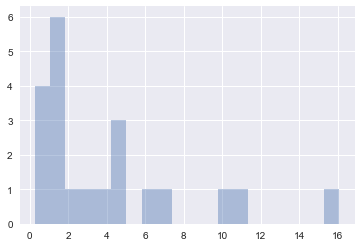

In [18]:
vis4 = sns.distplot(ReembolsoPartido,bins=20, kde=False)

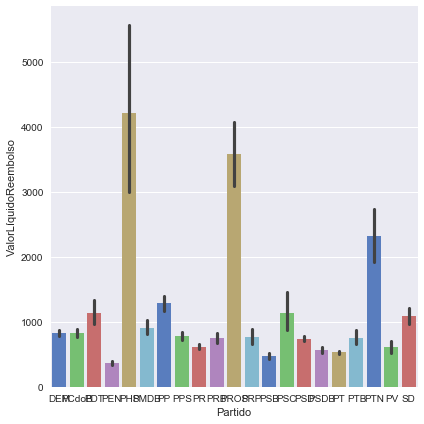

In [19]:
g = sns.factorplot(x="Partido", y="ValorLíquidoReembolso", data=dataset,size=6, kind="bar", palette="muted")

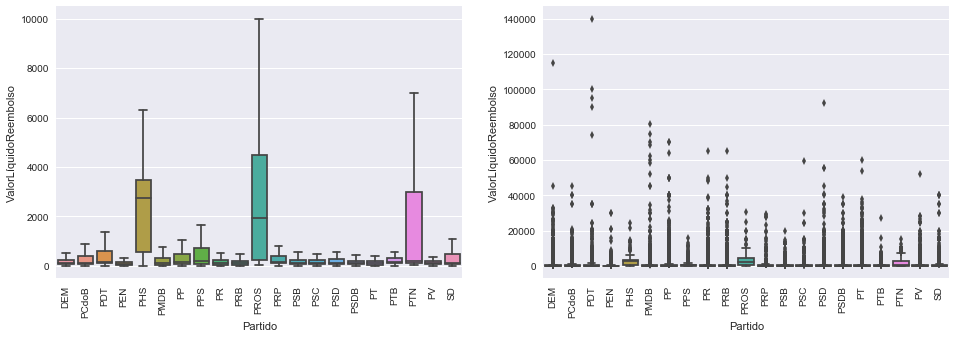

In [20]:
f , axes = plt.subplots(1,2, figsize = (16,5))
vis = sns.boxplot(data=dataset, x='Partido', y='ValorLíquidoReembolso', showfliers=False, ax=axes[0])
vis2 = sns.boxplot(data=dataset, x='Partido', y='ValorLíquidoReembolso', ax=axes[1])
vis.set_xticklabels(rotation=90, labels=dataset.Partido.cat.categories)
vis2.set_xticklabels(rotation=90, labels=dataset.Partido.cat.categories)
plt.show()

In [21]:
dataset.TipoDocumento.cat.categories

Int64Index([0, 1, 2, 3], dtype='int64')

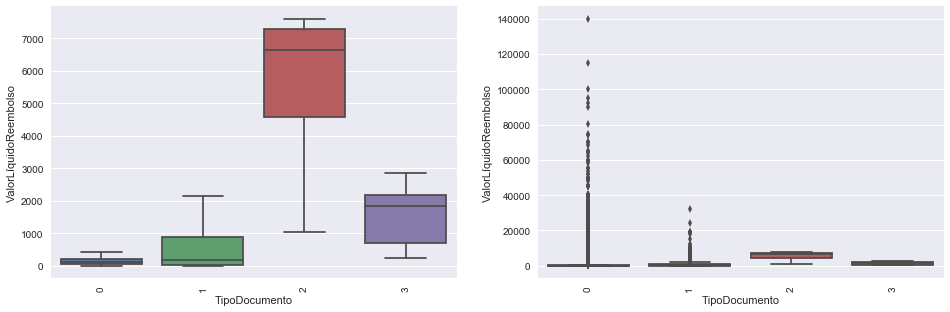

O valor reembolsado para o 0 foi de R$ 74.303 milhões
O valor reembolsado para o 1 foi de R$ 10.182 milhões
O valor reembolsado para o 2 foi de R$ 0.075 milhões
O valor reembolsado para o 3 foi de R$ 0.021 milhões


In [22]:
f , axes = plt.subplots(1,2, figsize = (16,5))
plt.figure(figsize=(16, 6))
documentoReembolso = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, showfliers=False, ax=axes[0])
documentoReembolso2 = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, ax=axes[1])
documentoReembolso.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
documentoReembolso2.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
#plt.axhline(dataset.ValorLíquidoReembolso.mean(), ls='--')
#plt.axhline(np.median(dataset.ValorLíquidoReembolso), ls='--', color='red')
plt.show()

TiposDeDocumento = list(dataset.TipoDocumento.cat.categories)
ReembolsoDocumento = []
for documento in TiposDeDocumento:
    reembolsado = dataset.ValorLíquidoReembolso[dataset.TipoDocumento == documento].sum()/1000000
    ReembolsoDocumento.append(reembolsado)
    print('O valor reembolsado para o {} foi de R$ {} milhões'.format(documento, round(reembolsado,3)))
ReembolsoDocumento = np.array(ReembolsoDocumento)

DescriçãoSubquota
<class 'str'>


AttributeError: 'str' object has no attribute 'cat'

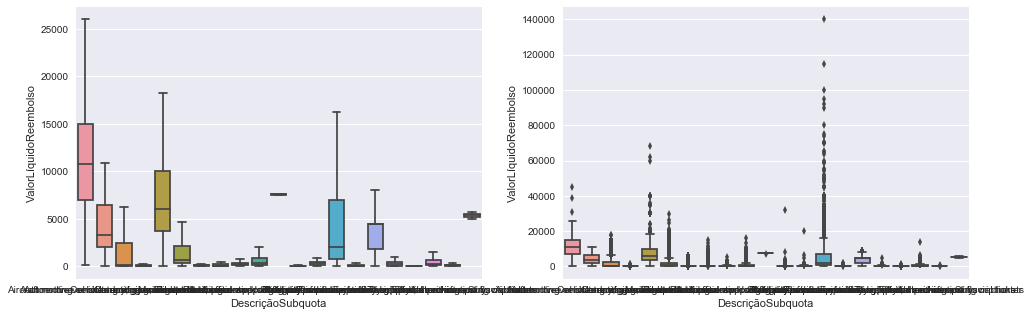

In [60]:
def grafico(categoria, valor = dataset.ValorLíquidoReembolso):
    print(categoria)
    print(type(categoria))

    f , axes = plt.subplots(1,2, figsize = (16,5))
    plt.figure(figsize=(16, 6))
    categoriaReembolso = sns.boxplot(data=dataset, x = categoria, y = valor, showfliers=False, ax=axes[0])
    categoriaReembolso2 = sns.boxplot(data=dataset, x = categoria, y = valor, ax=axes[1])
    categoriaReembolso.set_xticklabels(rotation=90, labels = categoria.cat.categories())
    categoriaReembolso2.set_xticklabels(rotation=90, labels = categoria.cat.categories())
    #plt.axhline(dataset.ValorLíquidoReembolso.mean(), ls='--')
    #plt.axhline(np.median(dataset.ValorLíquidoReembolso), ls='--', color='red')
    plt.xlabel(str(categoria))
    plt.show()
    
    Categorias = list(dataset.categoria.astype('category').cat.categories)
    print(Categorias)
    ReembolsoCategorias = []
    for categorias in Categorias:
        reembolsado = dataset.valor[dataset.categoria == categorias].sum()/1000000
        ReembolsoCategoria.append(reembolsado)
        print('O valor reembolsado na categoria {} foi de R$ {} milhões'.format(categoria, round(reembolsado,3)))
    ReembolsoCategoria = np.array(ReembolsoCategoria)
    
grafico('DescriçãoSubquota', 'ValorLíquidoReembolso')

In [78]:
def retorno(retrata):
    return retrata

retorno(dataset.Ano)

0         2009
1         2009
2         2009
3         2009
4         2009
5         2009
6         2009
7         2009
8         2009
9         2009
10        2009
11        2009
12        2009
13        2009
14        2009
15        2009
16        2009
17        2009
18        2009
19        2009
20        2009
21        2009
22        2009
23        2009
24        2009
25        2009
26        2009
27        2009
28        2009
29        2009
          ... 
118766    2017
118767    2017
118768    2017
118769    2017
118770    2017
118771    2017
118772    2017
118773    2017
118774    2017
118775    2017
118776    2017
118777    2017
118778    2017
118779    2017
118780    2017
118781    2017
118782    2017
118783    2017
118784    2017
118785    2017
118786    2017
118787    2017
118788    2017
118789    2017
118790    2017
118791    2017
118792    2017
118793    2017
118794    2017
118795    2017
Name: Ano, Length: 118796, dtype: category
Categories (9, int64): [2009, 2010, 2011, 

NameError: name 'teste' is not defined